In [1]:
#Question 4: What is the relationship between 
# size of the loan and number of employees on the payroll?


In [2]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
import json

In [3]:
#Read data
california_ppp_path = "../Resources/California_PPP.csv"

ppp_data = pd.read_csv(california_ppp_path)

ppp_data.head()

,LoanNumber,DateApproved,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,CurrentApprovalAmount,RuralUrbanIndicator,...,JobsReported,NAICSCode,Race,PAYROLL_PROCEED,BusinessType,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran
0,1048448901,04/24/2021,PPP,HUMANGOOD NORCAL,6120 Stoneridge Mall Rd Ste 300,Pleasanton,CA,94588-3298,10000000.0,U,...,500.0,623311.0,White,9999998.0,Sole Proprietorship,"Washington Federal Bank, National Association",SEATTLE,WA,Female Owned,Non-Veteran
1,1122827105,04/09/2020,PPP,ITO INCORPORATED,431 ISIS AVE,INGLEWOOD,CA,90301-2009,10000000.0,U,...,500.0,722310.0,Asian,9361000.0,Subchapter S Corporation,City National Bank,LOS ANGELES,CA,Male Owned,Non-Veteran
2,1187837109,04/10/2020,PPP,"HAVEN HEALTH GROUP, LLC","31752 COAST HWY, STE 300",LAGUNA BEACH,CA,92651-6782,10000000.0,U,...,500.0,623110.0,White,10000000.0,Limited Liability Company(LLC),East West Bank,PASADENA,CA,Male Owned,Non-Veteran
3,1321898800,04/10/2021,PPP,NORTH EAST MEDICAL SERVICES,2171 Junipero Serra Blvd,Daly City,CA,94014-1906,10000000.0,U,...,205.0,621498.0,Unanswered,10000000.0,501(c)3 – Non Profit,East West Bank,PASADENA,CA,Unanswered,Unanswered
4,1322998906,04/24/2021,PPP,PACIFIC CLINICS,800 S Santa Anita Ave,Arcadia,CA,91006-3536,10000000.0,U,...,103.0,621420.0,White,9999996.0,Non-Profit Organization,East West Bank,PASADENA,CA,Male Owned,Veteran


In [4]:
ppp_data.columns

Index(['LoanNumber', 'DateApproved', 'ProcessingMethod', 'BorrowerName',
       'BorrowerAddress', 'BorrowerCity', 'BorrowerState', 'BorrowerZip',
       'CurrentApprovalAmount', 'RuralUrbanIndicator', 'HubzoneIndicator',
       'LMIIndicator', 'ProjectCountyName', 'JobsReported', 'NAICSCode',
       'Race', 'PAYROLL_PROCEED', 'BusinessType', 'OriginatingLender',
       'OriginatingLenderCity', 'OriginatingLenderState', 'Gender', 'Veteran'],
      dtype='object')

The correlation between the number of employees and the loan amount recieved is 0.76
The r-squared is: 0.575


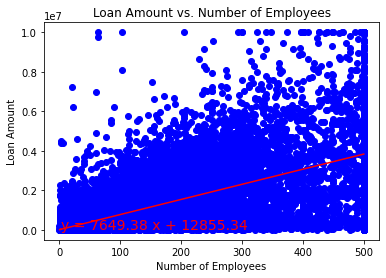

In [5]:
#Regression for whole data
correlation = st.pearsonr(ppp_data['JobsReported'],ppp_data['CurrentApprovalAmount'])
print(f"The correlation between the number of employees and the loan amount recieved is {round(correlation[0],2)}")

x_values = ppp_data["JobsReported"]
y_values = ppp_data["CurrentApprovalAmount"]

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_eq=f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(x_values,y_values,color="b")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=14,color='red')
plt.xlabel("Number of Employees")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs. Number of Employees")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

In [6]:
processing_count = ppp_data["ProcessingMethod"].value_counts()
processing_percentage=processing_count/ppp_data["ProcessingMethod"].count() * 100
processing_summary_df=pd.DataFrame({"Total Count": processing_count,
                                   "Percentage of Processes": processing_percentage})
processing_summary_df["Percentage of Processes"]=processing_summary_df["Percentage of Processes"].map("{0:.2f}%".format)
processing_summary_df

,Total Count,Percentage of Processes
PPP,946907,72.71%
PPS,355334,27.29%


In [7]:
ppp_df = ppp_data.loc[ppp_data["ProcessingMethod"] == "PPP",:]

ppp_df=ppp_df.loc[(ppp_df.Race == "American Indian or Alaska Native") | 
           (ppp_df.Race == "Asian") |
           (ppp_df.Race == "Black or African American") |
           (ppp_df.Race == "Multi Group") |
           (ppp_df.Race == "Native Hawaiian or Other Pacific Islander") |
           (ppp_df.Race == "Puerto Rican") |
           (ppp_df.Race == "White")]
ppp_df

,LoanNumber,DateApproved,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,CurrentApprovalAmount,RuralUrbanIndicator,...,JobsReported,NAICSCode,Race,PAYROLL_PROCEED,BusinessType,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran
0,1048448901,04/24/2021,PPP,HUMANGOOD NORCAL,6120 Stoneridge Mall Rd Ste 300,Pleasanton,CA,94588-3298,10000000.00,U,...,500.0,623311.0,White,9999998.00,Sole Proprietorship,"Washington Federal Bank, National Association",SEATTLE,WA,Female Owned,Non-Veteran
1,1122827105,04/09/2020,PPP,ITO INCORPORATED,431 ISIS AVE,INGLEWOOD,CA,90301-2009,10000000.00,U,...,500.0,722310.0,Asian,9361000.00,Subchapter S Corporation,City National Bank,LOS ANGELES,CA,Male Owned,Non-Veteran
2,1187837109,04/10/2020,PPP,"HAVEN HEALTH GROUP, LLC","31752 COAST HWY, STE 300",LAGUNA BEACH,CA,92651-6782,10000000.00,U,...,500.0,623110.0,White,10000000.00,Limited Liability Company(LLC),East West Bank,PASADENA,CA,Male Owned,Non-Veteran
4,1322998906,04/24/2021,PPP,PACIFIC CLINICS,800 S Santa Anita Ave,Arcadia,CA,91006-3536,10000000.00,U,...,103.0,621420.0,White,9999996.00,Non-Profit Organization,East West Bank,PASADENA,CA,Male Owned,Veteran
28,4152297705,05/01/2020,PPP,GENEVA STAFFING INC,15941 RED HILL SUITE 100,TUSTIN,CA,92780,10000000.00,U,...,500.0,NaN,White,10000000.00,Corporation,"Wells Fargo Bank, National Association",SIOUX FALLS,SD,Unanswered,Unanswered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302218,6261837307,04/30/2020,PPP,TERESA MATTOS ART,200 ELINOR ST,CAPITOLA,CA,95010-2316,49.00,U,...,1.0,611699.0,White,49.00,Sole Proprietorship,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran
1302224,8977007310,05/01/2020,PPP,BOBLY INC,170 PACIFIC AVENUE UNIT 52,SAN FRANCISCO,CA,94111,40.00,U,...,2.0,519190.0,White,40.00,Limited Liability Company(LLC),"Wells Fargo Bank, National Association",SIOUX FALLS,SD,Unanswered,Unanswered
1302230,6498857409,05/14/2020,PPP,THYME ON THE COAST CUISINE,169 FLOWER ST,COSTA MESA,CA,92627-2835,28.00,U,...,1.0,722320.0,White,28.00,Sole Proprietorship,"Bank of America, National Association",CHARLOTTE,NC,Female Owned,Veteran
1302232,3534747808,05/26/2020,PPP,ANNE DRISCOLL,40044 HWY 49 Suite B1,Oakhurst,CA,93644-8875,24.17,R,...,2.0,451211.0,American Indian or Alaska Native,18.12,Sole Proprietorship,Celtic Bank Corporation,SALT LAKE CITY,UT,Unanswered,Non-Veteran


The correlation between the number of employees and the loan amount recieved is 0.72
The r-squared is: 0.524


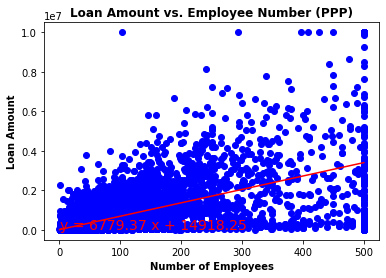

In [23]:
#Regression for PPP
correlation = st.pearsonr(ppp_df['JobsReported'],ppp_df['CurrentApprovalAmount'])
print(f"The correlation between the number of employees and the loan amount recieved is {round(correlation[0],2)}")

x_values = ppp_df["JobsReported"]
y_values = ppp_df["CurrentApprovalAmount"]

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_eq=f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(x_values,y_values,color="b")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=14,color='red')
plt.xlabel("Number of Employees",fontweight='bold')
plt.ylabel("Loan Amount",fontweight='bold')
plt.title("Loan Amount vs. Employee Number (PPP)", fontweight='bold')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()


The correlation between the number of employees and the loan amount recieved is 0.99
The r-squared is: 0.989


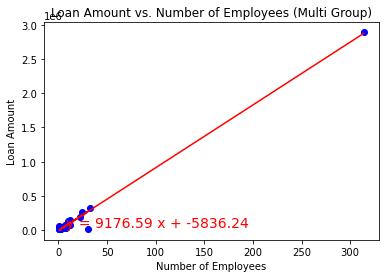

In [9]:
#MultiGroup Regression
multi_ppp_df = ppp_df.loc[ppp_df["Race"] == "Multi Group",:]

correlation = st.pearsonr(multi_ppp_df['JobsReported'],multi_ppp_df['CurrentApprovalAmount'])
print(f"The correlation between the number of employees and the loan amount recieved is {round(correlation[0],2)}")

x_values = multi_ppp_df["JobsReported"]
y_values = multi_ppp_df["CurrentApprovalAmount"]

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_eq=f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(x_values,y_values,color="b")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=14,color='red')
plt.xlabel("Number of Employees")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs. Number of Employees (Multi Group)")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()


The correlation between the number of employees and the loan amount recieved is 0.75
The r-squared is: 0.564


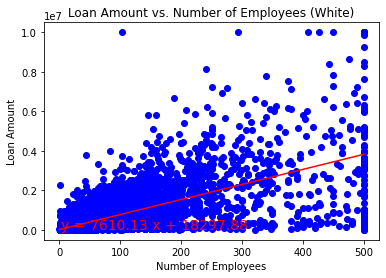

In [10]:
#White Regression
white_ppp_df = ppp_df.loc[ppp_df["Race"] == "White",:]

correlation = st.pearsonr(white_ppp_df['JobsReported'],white_ppp_df['CurrentApprovalAmount'])
print(f"The correlation between the number of employees and the loan amount recieved is {round(correlation[0],2)}")

x_values = white_ppp_df["JobsReported"]
y_values = white_ppp_df["CurrentApprovalAmount"]

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_eq=f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(x_values,y_values,color="b")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=14,color='red')
plt.xlabel("Number of Employees")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs. Number of Employees (White)")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()


The correlation between the number of employees and the loan amount recieved is 0.66
The r-squared is: 0.434


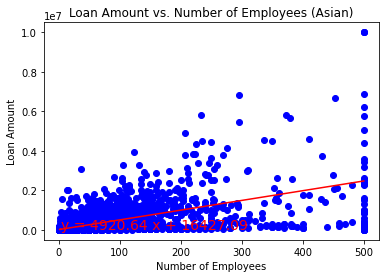

In [11]:
#Asian Regression
asian_ppp_df = ppp_df.loc[ppp_df["Race"] == "Asian",:]

correlation = st.pearsonr(asian_ppp_df['JobsReported'],asian_ppp_df['CurrentApprovalAmount'])
print(f"The correlation between the number of employees and the loan amount recieved is {round(correlation[0],2)}")

x_values = asian_ppp_df["JobsReported"]
y_values = asian_ppp_df["CurrentApprovalAmount"]

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_eq=f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(x_values,y_values,color="b")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=14,color='red')
plt.xlabel("Number of Employees")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs. Number of Employees (Asian)")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()


The correlation between the number of employees and the loan amount recieved is 0.61
The r-squared is: 0.372


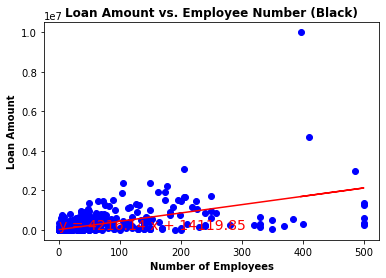

In [25]:
#Black Regression
black_ppp_df = ppp_df.loc[ppp_df["Race"] == "Black or African American",:]

correlation = st.pearsonr(black_ppp_df['JobsReported'],black_ppp_df['CurrentApprovalAmount'])
print(f"The correlation between the number of employees and the loan amount recieved is {round(correlation[0],2)}")

x_values = black_ppp_df["JobsReported"]
y_values = black_ppp_df["CurrentApprovalAmount"]

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_eq=f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(x_values,y_values,color="b")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=14,color='red')
plt.xlabel("Number of Employees",fontweight='bold')
plt.ylabel("Loan Amount",fontweight='bold')
plt.title("Loan Amount vs. Employee Number (Black)",fontweight='bold')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()


The correlation between the number of employees and the loan amount recieved is 0.78
The r-squared is: 0.606


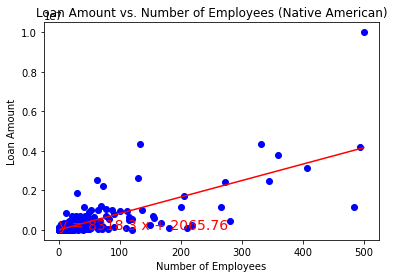

In [13]:
#American Indian Regression
indian_ppp_df = ppp_df.loc[ppp_df["Race"] == "American Indian or Alaska Native",:]

correlation = st.pearsonr(indian_ppp_df['JobsReported'],indian_ppp_df['CurrentApprovalAmount'])
print(f"The correlation between the number of employees and the loan amount recieved is {round(correlation[0],2)}")

x_values = indian_ppp_df["JobsReported"]
y_values = indian_ppp_df["CurrentApprovalAmount"]

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_eq=f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(x_values,y_values,color="b")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=14,color='red')
plt.xlabel("Number of Employees")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs. Number of Employees (Native American)")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()


The correlation between the number of employees and the loan amount recieved is 0.56
The r-squared is: 0.319


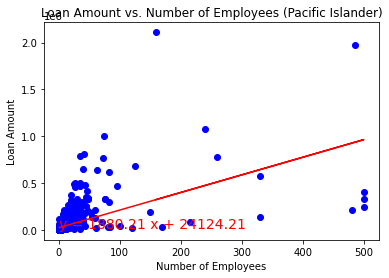

In [14]:
#Native Hawaiian or Pacific Islander Regression
island_ppp_df = ppp_df.loc[ppp_df["Race"] == "Native Hawaiian or Other Pacific Islander",:]

correlation = st.pearsonr(island_ppp_df['JobsReported'],island_ppp_df['CurrentApprovalAmount'])
print(f"The correlation between the number of employees and the loan amount recieved is {round(correlation[0],2)}")

x_values = island_ppp_df["JobsReported"]
y_values = island_ppp_df["CurrentApprovalAmount"]

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_eq=f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(x_values,y_values,color="b")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=14,color='red')
plt.xlabel("Number of Employees")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs. Number of Employees (Pacific Islander)")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()


The correlation between the number of employees and the loan amount recieved is 1.0
The r-squared is: 0.991


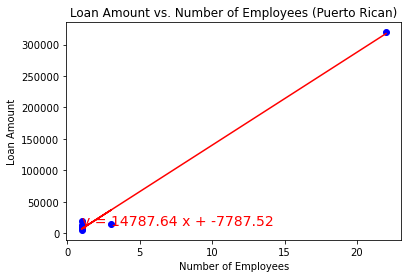

In [20]:
# #Puerto Rican
rican_ppp_df = ppp_df.loc[ppp_df["Race"] == "Puerto Rican",:]

correlation = st.pearsonr(rican_ppp_df['JobsReported'],rican_ppp_df['CurrentApprovalAmount'])
print(f"The correlation between the number of employees and the loan amount recieved is {round(correlation[0],2)}")

x_values = rican_ppp_df["JobsReported"]
y_values = rican_ppp_df["CurrentApprovalAmount"]

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_eq=f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(x_values,y_values,color="b")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=14,color='red')
plt.xlabel("Number of Employees")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs. Number of Employees (Puerto Rican)")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()
